# Decision Tree

## Imports

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

## Preprocessing

### Loading Dataset

In [45]:
filePath = "bank-additional\\bank-additional\\bank-additional-full.csv"
data = pd.read_csv(filePath, sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Encoding Categorical Variables
Transforming non-numeric labels into numeric labels.

In [46]:
categorical_label_encoder = LabelEncoder()

for variable in data.select_dtypes(include=["object"]).columns:
    data[variable] = categorical_label_encoder.fit_transform(data[variable])

### Seperating Features and the Target
Seperating/Dropping the target variable (AKA the output variable) from the features (input variables). This is done because the model the target variable itself isn't used to train the model, instead the features are to train the model in order to predict the target variable; therefore, to prevent the model from learning incorrect patterns and because the model is evaluated on the target variable, it is necessary to drop the target variable.

In [47]:
features = data.drop("y", axis=1)
target = data["y"]

### Standardization
The aim of Standardization is to increase data quality through eliminating errors, inconsistencies and redundant data. Through having a higher quality dataset, the model will be able to learn patterns from more verbose data leading to better predictions.

In [48]:
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features)

### Train Test Split
A dataset is split into two parts, the training dataset and the testing dataset. This done so a model can be tested/evaluated after training it, without testing the model, it won't be possbile to find out whether a it is underfitted or overfitted (Bias-Variance Tradeoff).

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, train_size=0.8, test_size=0.2, random_state=42)

## Creating the Decision Tree Model

In [50]:
random_forest_model = RandomForestClassifier()

## Training the Decision Tree Model

In [51]:
trained_random_forest = random_forest_model.fit(X_train, y_train)

## Testing the Decision Tree Model

In [52]:
training_predictions = (random_forest_model.predict(X_train) > 0.5).astype("int32")
testing_predictions = (random_forest_model.predict(X_test) > 0.5).astype("int32")

### Accuracy Score

In [53]:
model_accuracy_score_training = accuracy_score(y_train, training_predictions)
model_accuracy_score_testing = accuracy_score(y_test, testing_predictions)
print("Training Accuracy: ", model_accuracy_score_training)
print("Testing Accuracy: ", model_accuracy_score_testing)

Training Accuracy:  1.0
Testing Accuracy:  0.9133284777858703


### Confusion Matrix

[[7041  262]
 [ 452  483]]


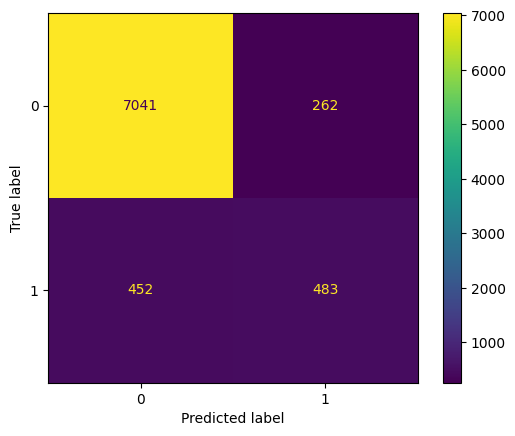

In [54]:
model_confusion_matrix = confusion_matrix(y_test, testing_predictions)
print(model_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=model_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

### Classification Report
Since the dataset is an imbalanced dataset, the model will perform less efficiently on the minority class of "1" than the majority class of "0", causing the low precision, recall and f1-score despire having a high accuracy overall.

In [55]:
model_classification_report = classification_report(y_test, testing_predictions)
print(model_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

